In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
author_stat_path = 'data/pdata/author_stat@1.1.csv'
commit_stat_path = 'data/pdata/commit_stat_0.csv'

In [11]:
commit = pd.read_csv(commit_stat_path,index_col=['bug'])
author = pd.read_csv(author_stat_path,index_col=['author'])

In [12]:
print(commit.info())
print(author.info())

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 95f0b77ef to 76f0c53d08b9
Data columns (total 11 columns):
fix                  492 non-null object
fix_distance         492 non-null float64
find_bug_time        492 non-null float64
fix_bug_time         492 non-null float64
nloc                 492 non-null float64
CCN                  492 non-null float64
function_numbers     492 non-null float64
token_count          492 non-null float64
parameter_count      492 non-null float64
find_bug_time_day    492 non-null float64
fix_bug_time_day     492 non-null float64
dtypes: float64(10), object(1)
memory usage: 46.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, Zhuoyu Zhang to Mark Brown
Data columns (total 13 columns):
commits_number               3391 non-null int64
bug_commits_number           3391 non-null int64
total_fix_distance           3391 non-null float64
total_find_bug_time          3391 non-null float64
total_fix_bug_time           3391 non-null f

# 1. Linear Regression


## 1. 1 Hypothesis 1:
####   The more complex the code is, the harder it is to discover its bug(s).

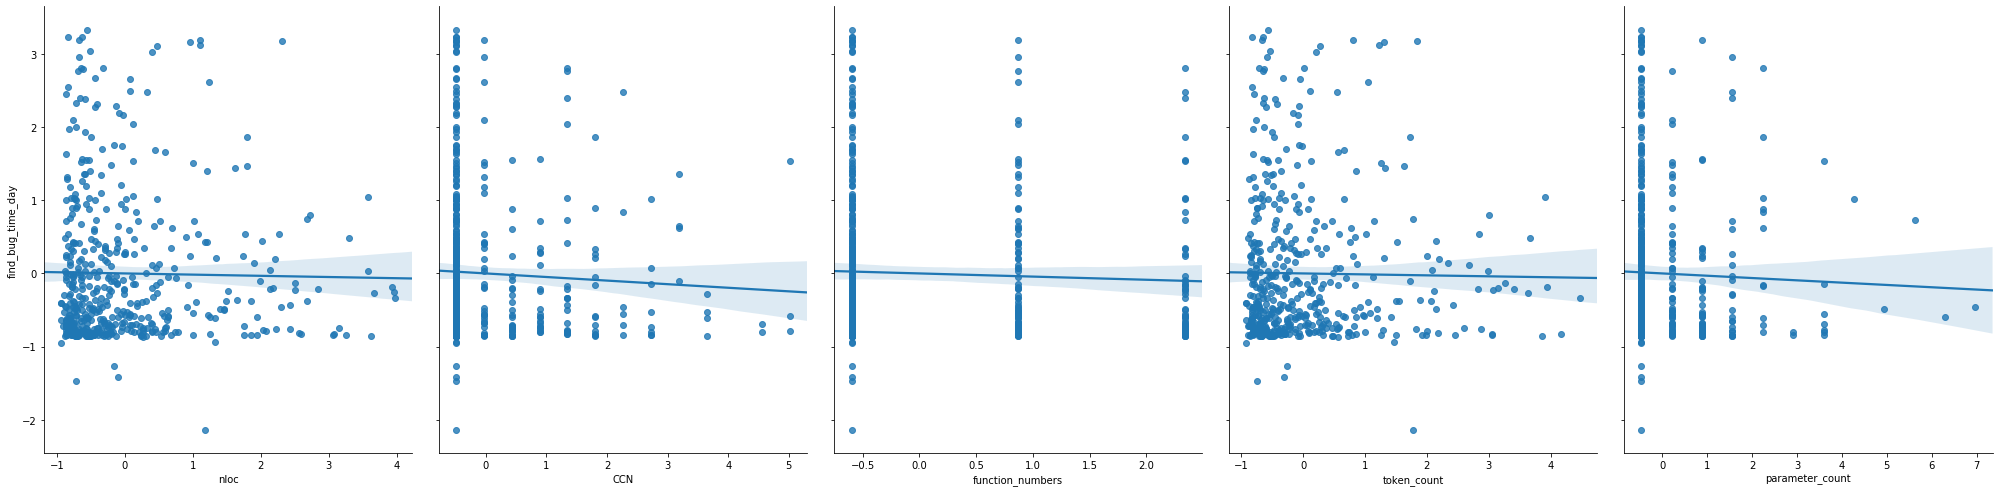

In [44]:
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='find_bug_time_day',height=7, aspect=0.8,kind = 'reg')

In [20]:
x_values = commit[['nloc','CCN','function_numbers','token_count','parameter_count']]
y_value =  commit['find_bug_time_day']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is -0.01018173351458639
The coef is [-0.07730007 -0.12258498  0.02429975  0.03704631 -0.00491021]
The score is -0.06676111990772404


## 1.2 Hypothesis 2:
####     The more complex the code is, the harder it is to fix its bug(s).

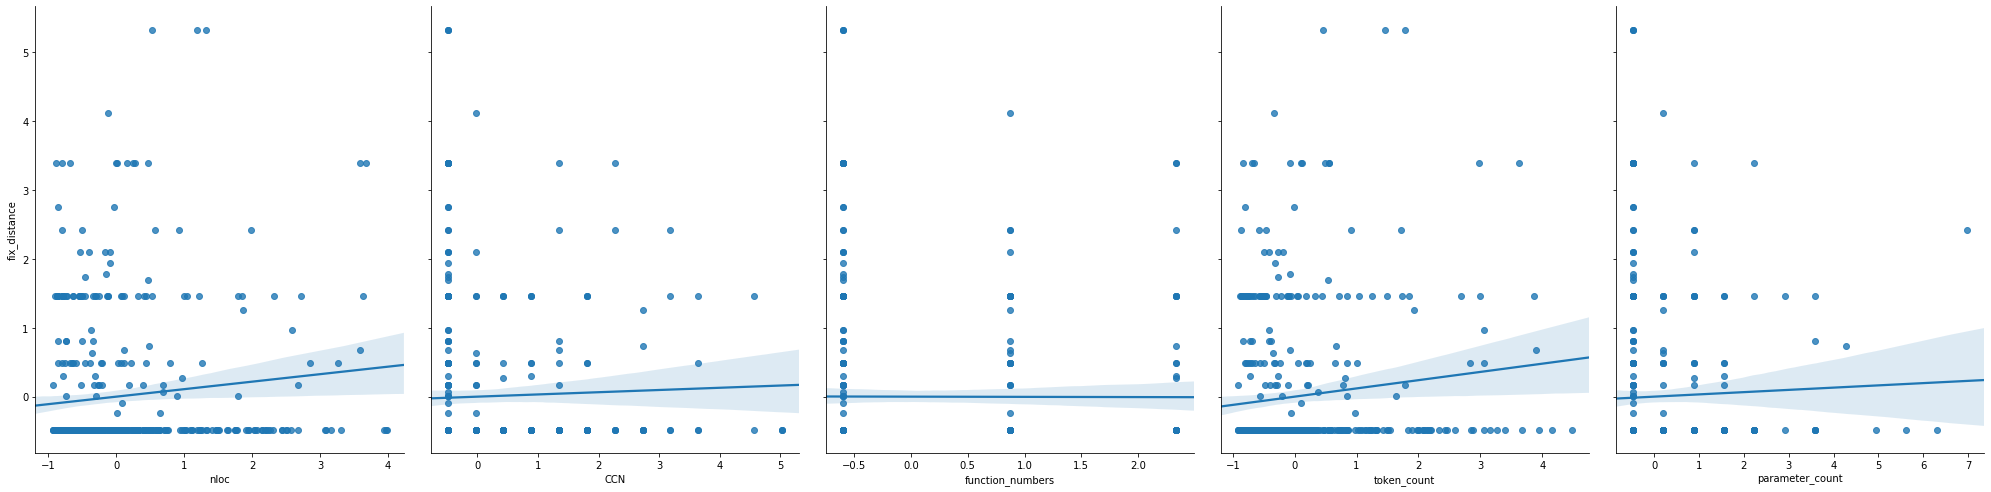

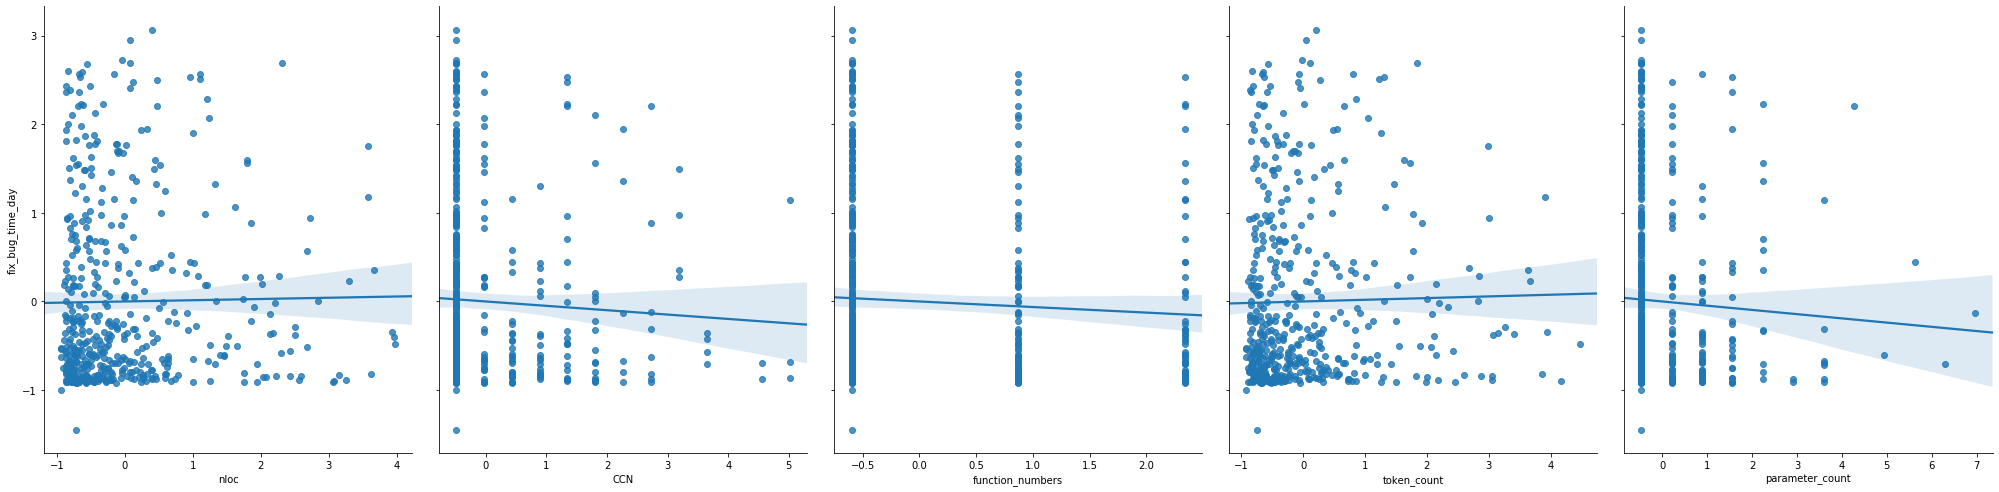

In [45]:
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='fix_distance',height=7, aspect=0.8,kind = 'reg')
sns.pairplot(commit, x_vars=['nloc','CCN','function_numbers','token_count','parameter_count'], y_vars='fix_bug_time_day',height=7, aspect=0.8,kind = 'reg')

In [21]:
x_values = commit[['nloc','CCN','function_numbers','token_count','parameter_count']]
y_value =  commit['fix_bug_time_day']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is -0.02252789079213765
The coef is [-0.05805343 -0.01942049 -0.00867654  0.05406682 -0.03885121]
The score is -0.013361348308538856


In [22]:
x_values = commit[['nloc','CCN','function_numbers','token_count','parameter_count']]
y_value =  commit['fix_distance']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is -0.00042613163711461666
The coef is [-0.05636782  0.06061624 -0.14069114  0.16429646  0.08669994]
The score is 0.017431071153330868


## 1.3 Hypothesis 3:
####     The bugs in the code from experienced developers are hard to discover.

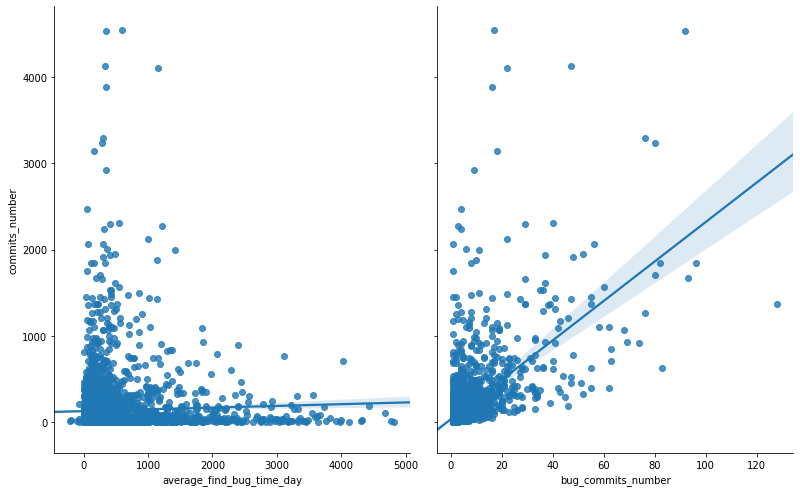

In [50]:
sns.pairplot(author, x_vars=['average_find_bug_time_day','bug_commits_number'], y_vars='commits_number',height=7, aspect=0.8,kind = 'reg')

In [33]:
x_values = author['average_find_bug_time_day']
y_value =  author['commits_number']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
X_train = X_train.values.reshape(-1,1)
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
X_test = X_test.values.reshape(-1,1)
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is 127.10967566350114
The coef is [0.01986341]
The score is 0.0009554752397117339


In [36]:
x_values = author['bug_commits_number']
y_value =  author['commits_number']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
X_train = X_train.values.reshape(-1,1)
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
X_test = X_test.values.reshape(-1,1)
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is 33.83920234556953
The coef is [21.57137614]
The score is 0.44267249953818233


In [40]:
x_values = author[['average_find_bug_time_day','bug_commits_number']]
y_value =  author['commits_number']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is 11.65746449299212
The coef is [ 0.04006287 22.49611216]
The score is 0.3954294691074993


## 1.4 Hypothesis 4:
####     The bugs in the code from experienced developers are easy to fix.

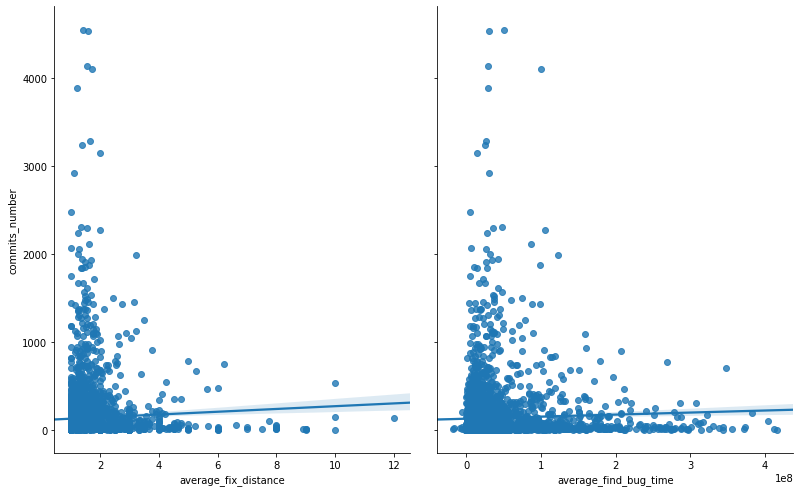

In [51]:
sns.pairplot(author, x_vars=['average_fix_distance','average_find_bug_time'], y_vars='commits_number',height=7, aspect=0.8,kind = 'reg')

In [42]:
x_values = author[['average_fix_distance','average_find_bug_time']]
y_value =  author['commits_number']
X_train,X_test,Y_train,Y_test = train_test_split(x_values,y_value,train_size=.80)
model = LinearRegression()
model.fit(X_train,Y_train)
print('The intercept is {}'.format(model.intercept_))
print('The coef is {}'.format(model.coef_))
score = model.score(X_test,Y_test)
print('The score is {}'.format(score))

The intercept is 103.84212937567045
The coef is [1.37126023e+01 2.54481995e-07]
The score is -0.0005225070407917087
